In [1]:
import pandas as pd
import matplotlib.pyplot as plt


#Importing file which contains sales data

In [2]:
df = pd.read_csv("/content/train.csv")

In [17]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9800 entries, 2015-01-03 to 2018-12-30
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Ship Date      9800 non-null   object 
 3   Ship Mode      9800 non-null   object 
 4   Customer ID    9800 non-null   object 
 5   Customer Name  9800 non-null   object 
 6   Segment        9800 non-null   object 
 7   Country        9800 non-null   object 
 8   City           9800 non-null   object 
 9   State          9800 non-null   object 
 10  Postal Code    9789 non-null   float64
 11  Region         9800 non-null   object 
 12  Product ID     9800 non-null   object 
 13  Category       9800 non-null   object 
 14  Sub-Category   9800 non-null   object 
 15  Product Name   9800 non-null   object 
 16  Sales          9800 non-null   float64
dtypes: float64(2), int64(1), object(14

In [4]:
import seaborn as sns
#date column to datetime
plt.style.use('seaborn-v0_8')

In [6]:
df['Order Date'] = pd.to_datetime(df['Order Date'], dayfirst=True)

In [7]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,2017-11-08,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,2017-11-08,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,2017-06-12,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,2016-10-11,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,2016-10-11,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


The first line shows actual monthly sales, and the second line shows a 3-month moving average that smooths fluctuations to highlight the overall trend.

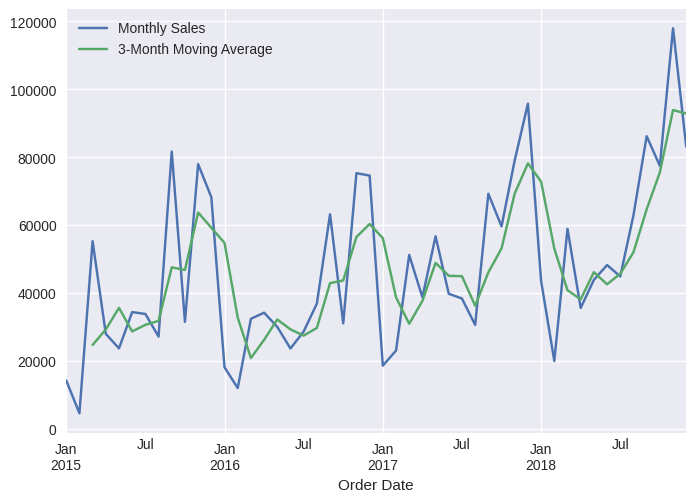

In [16]:
monthly_sales.plot(label="Monthly Sales")
monthly_sales.rolling(3).mean().plot(label="3-Month Moving Average")
plt.legend()
plt.show()


In [8]:
# Sort by date
df = df.sort_values('Order Date')

#Sales over time graph by line chart

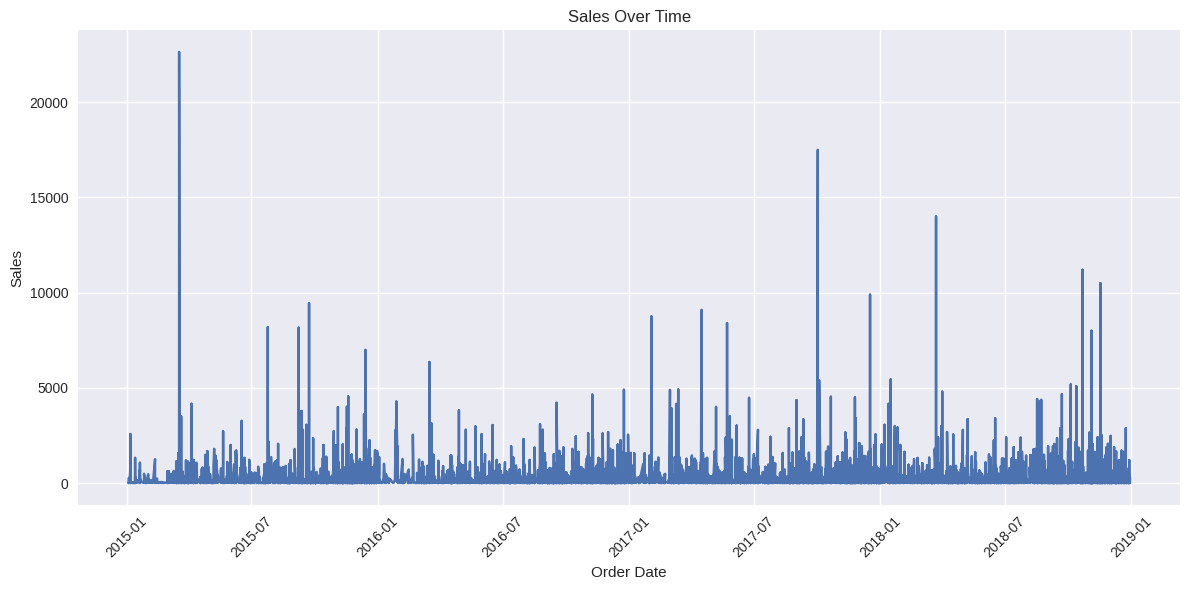

In [9]:
plt.figure(figsize=(12,6))
plt.plot(df['Order Date'], df['Sales'])
plt.title("Sales Over Time")
plt.xlabel("Order Date")
plt.ylabel("Sales")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("sales_over_time.png")
plt.show()

In [10]:
df.set_index('Order Date', inplace=True)

#Monthly and Quaterly sales stats

/tmp/ipython-input-3264107474.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = df['Sales'].resample('M').sum()


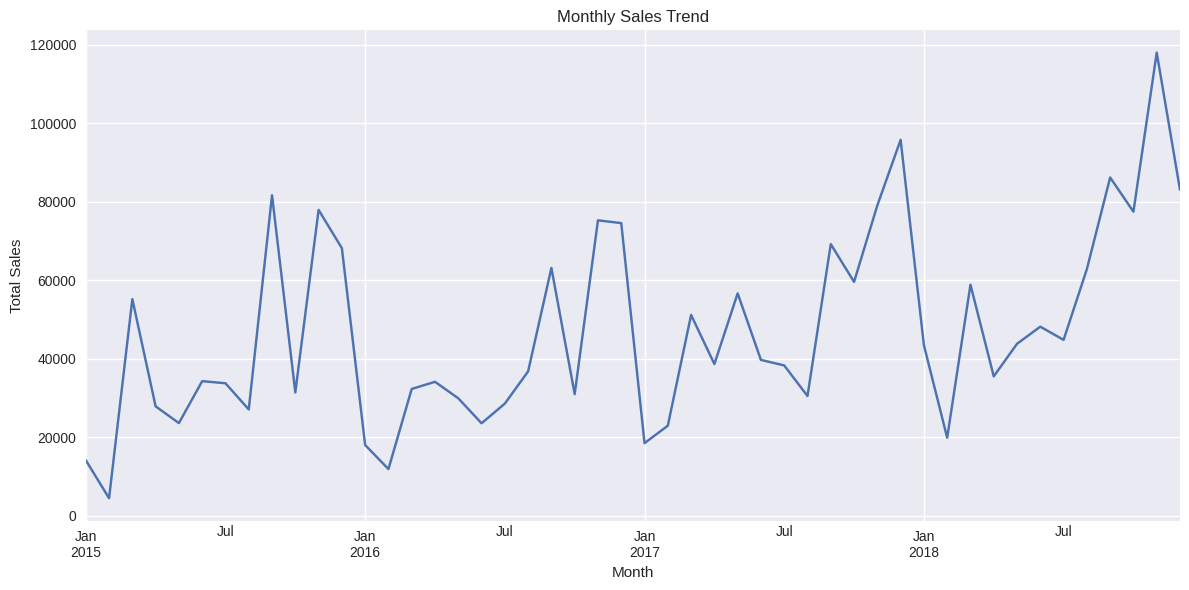

In [11]:
monthly_sales = df['Sales'].resample('M').sum()

plt.figure(figsize=(12,6))
monthly_sales.plot()
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.tight_layout()
plt.savefig("monthly_sales.png")
plt.show()

/tmp/ipython-input-38303754.py:1: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  quarterly_sales = df['Sales'].resample('Q').sum()


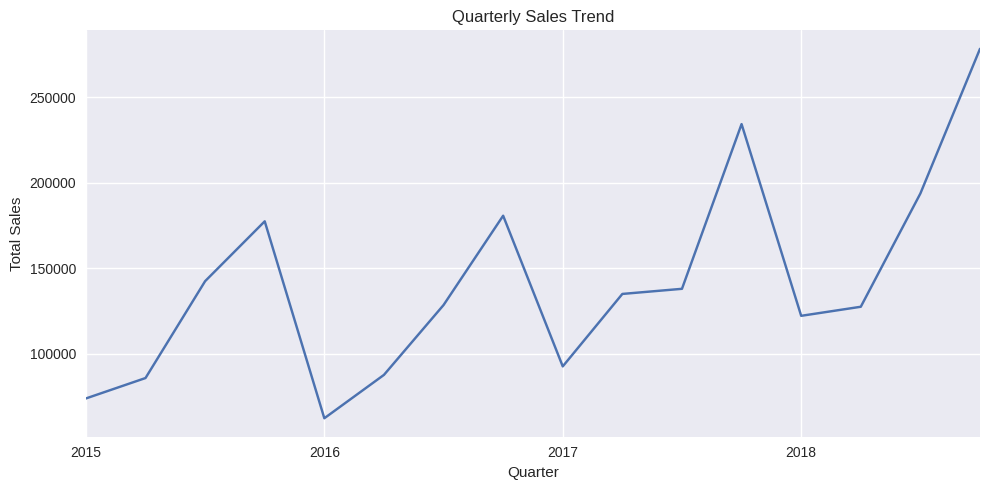

In [12]:
quarterly_sales = df['Sales'].resample('Q').sum()

plt.figure(figsize=(10,5))
quarterly_sales.plot()
plt.title("Quarterly Sales Trend")
plt.xlabel("Quarter")
plt.ylabel("Total Sales")
plt.tight_layout()
plt.savefig("quarterly_sales.png")
plt.show()


#Bar chart total sales according to category

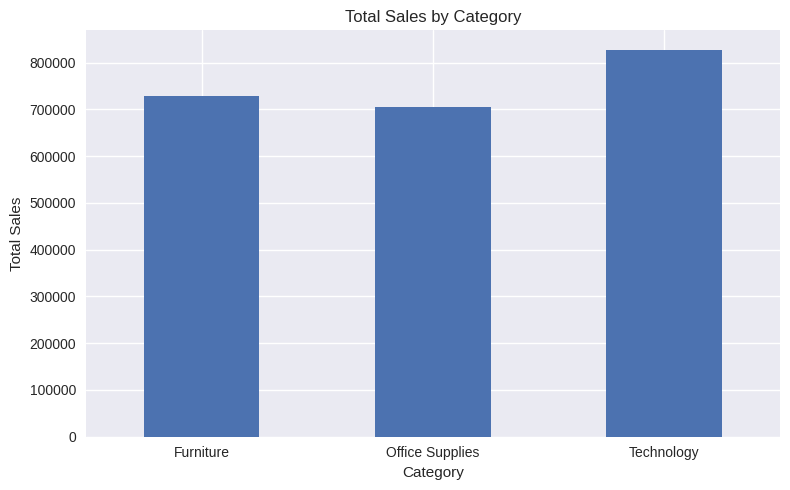

In [13]:
category_sales = df.groupby('Category')['Sales'].sum()

plt.figure(figsize=(8,5))
category_sales.plot(kind='bar')
plt.title("Total Sales by Category")
plt.xlabel("Category")
plt.ylabel("Total Sales")
plt.xticks(rotation=0)
plt.tight_layout()
plt.savefig("category_bar_chart.png")
plt.show()


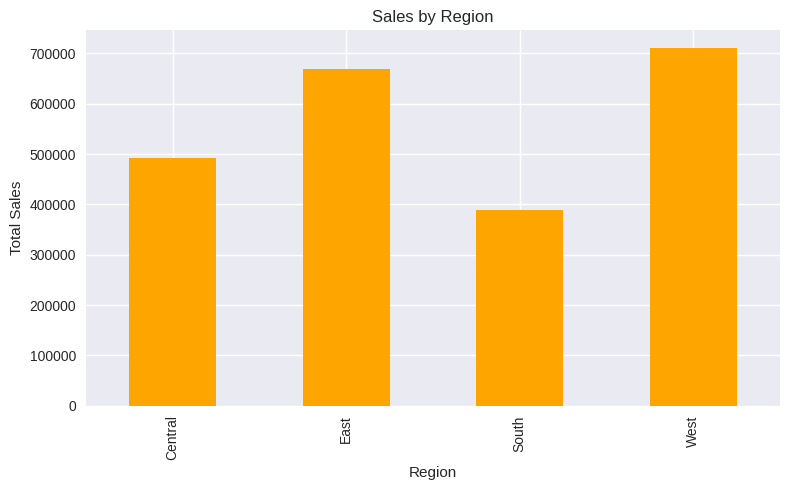

In [18]:
region_sales = df.groupby('Region')['Sales'].sum()

plt.figure(figsize=(8,5))
region_sales.plot(kind='bar', color='orange')
plt.title("Sales by Region")
plt.xlabel("Region")
plt.ylabel("Total Sales")
plt.tight_layout()
plt.savefig("region_sales.png")
plt.show()


#Pie chart

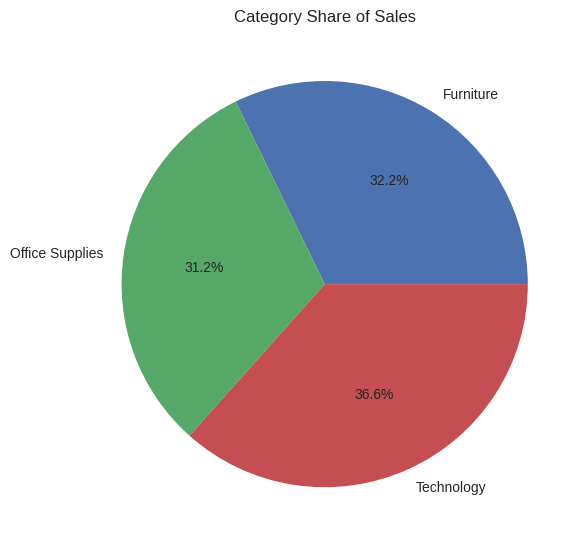

In [14]:
plt.figure(figsize=(6,6))
category_sales.plot(kind='pie', autopct='%1.1f%%')
plt.title("Category Share of Sales")
plt.ylabel("")
plt.tight_layout()
plt.savefig("category_pie_chart.png")
plt.show()


#Summary of analysis

In [15]:
summary = f"""
SALES ANALYSIS SUMMARY

Total Sales: {df['Sales'].sum():,.2f}

Highest Sales Category: {category_sales.idxmax()}
Lowest Sales Category: {category_sales.idxmin()}

Highest Monthly Sales: {monthly_sales.max():,.2f}
Highest Quarterly Sales: {quarterly_sales.max():,.2f}
"""

with open("summary.txt", "w") as f:
    f.write(summary)

print(summary)



SALES ANALYSIS SUMMARY

Total Sales: 2,261,536.78

Highest Sales Category: Technology
Lowest Sales Category: Office Supplies

Highest Monthly Sales: 117,938.15
Highest Quarterly Sales: 278,416.67

